<a href="https://colab.research.google.com/github/Betsy03/CNN_Image-Classification_cipar/blob/main/Image_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [55]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

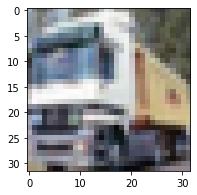

In [ ]:
plt.figure(figsize=(15,3))
plt.imshow(X_train[1])

In [56]:
y_train=y_train.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_image(X,y,index):
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

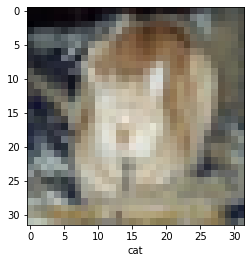

In [ ]:
plot_image(X_train,y_train,33)

In [ ]:
y_train[33]

3

In [57]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train[4]

array([[[0.25490196, 0.26666667, 0.19607843],
        [0.2745098 , 0.31764706, 0.25098039],
        [0.18823529, 0.25098039, 0.18039216],
        ...,
        [0.2       , 0.2627451 , 0.16078431],
        [0.21176471, 0.29803922, 0.20784314],
        [0.2627451 , 0.34117647, 0.25882353]],

       [[0.27058824, 0.31372549, 0.22745098],
        [0.30980392, 0.4       , 0.31764706],
        [0.23529412, 0.29019608, 0.22352941],
        ...,
        [0.21176471, 0.25882353, 0.17254902],
        [0.25490196, 0.35294118, 0.27058824],
        [0.23921569, 0.31764706, 0.25882353]],

       [[0.28627451, 0.37254902, 0.28235294],
        [0.32941176, 0.42745098, 0.34117647],
        [0.28235294, 0.34509804, 0.2745098 ],
        ...,
        [0.30588235, 0.38431373, 0.29411765],
        [0.28627451, 0.38431373, 0.30196078],
        [0.18823529, 0.23137255, 0.2       ]],

       ...,

       [[0.37254902, 0.49803922, 0.36078431],
        [0.35686275, 0.48235294, 0.3372549 ],
        [0.22352941, 0

Build ANN

In [63]:
from tensorflow import keras
ann=keras.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')                      
])
                           
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])    
ann.fit(X_train,y_train,epochs=10)                      
                           

Epoch 1/10
1563/1563 [==============================] - 121s 77ms/step - loss: 3.8110 - accuracy: 0.0998
Epoch 2/10
1005/1563 [==================>...........] - ETA: 44s - loss: 3.8100 - accuracy: 0.0996

KeyboardInterrupt: ignored

In [61]:
ann.evaluate(X_train,y_train)

1563/1563 [==============================] - 36s 23ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302555561065674, 0.10000000149011612]

In [62]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 7s 23ms/step - loss: 2.3026 - accuracy: 0.1000


[2.30259108543396, 0.10000000149011612]

Build CNN

In [79]:
cnn=keras.Sequential([
                     layers.Conv2D(filters=64, kernel_size=(4,4),activation='relu'),
                     layers.MaxPooling2D((2,2)) ,
                     layers.Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
                     layers.MaxPooling2D((2,2)) ,

                     #dense
                      layers.Flatten(),
                      layers.Dense(64,activation='relu'),
                      layers.Dense(10,activation='softmax')
])

In [80]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [81]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 90s 58ms/step - loss: 1.4673 - accuracy: 0.4736
Epoch 2/10
1563/1563 [==============================] - 88s 56ms/step - loss: 1.1364 - accuracy: 0.6006
Epoch 3/10
1563/1563 [==============================] - 89s 57ms/step - loss: 1.0118 - accuracy: 0.6494
Epoch 4/10
1563/1563 [==============================] - 88s 57ms/step - loss: 0.9267 - accuracy: 0.6769
Epoch 5/10
1563/1563 [==============================] - 88s 57ms/step - loss: 0.8573 - accuracy: 0.7021
Epoch 6/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8108 - accuracy: 0.7176
Epoch 7/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.7644 - accuracy: 0.7325
Epoch 8/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.7202 - accuracy: 0.7482
Epoch 9/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.6842 - accuracy: 0.7591
Epoch 10/10
1563/1563 [==============================] - 88s 56m

In [82]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 0.9559 - accuracy: 0.6850


[0.955905556678772, 0.6850000023841858]

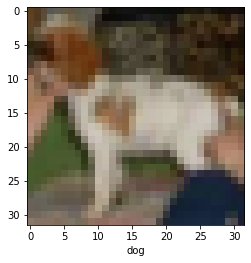

In [85]:
y_test=y_test.reshape(-1,)
plot_image(X_test,y_test,12)

In [92]:
from sklearn.metrics import classification_report
y_pred=cnn.predict(X_test)
y_pred_class=[np.argmax(i) for i in y_pred]

In [95]:
y_pred_class[3]

0

In [96]:
y_test[3]

0

In [98]:
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      1000
           1       0.81      0.79      0.80      1000
           2       0.56      0.60      0.58      1000
           3       0.51      0.52      0.51      1000
           4       0.66      0.57      0.61      1000
           5       0.61      0.59      0.60      1000
           6       0.78      0.72      0.75      1000
           7       0.75      0.73      0.74      1000
           8       0.71      0.87      0.79      1000
           9       0.76      0.76      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.69      0.68     10000

